# Handling Image Data in Python

In this notebook, we will go through some functions and methods to manipulate images in Python.
The purpose of this notebook is to provide you with a minimal set of handles to practice with the next steps of the SOSC Project, not to give a complete overview of image processing.
In case you wish to know more on image processing, you may have a look to the documentation of the following libraries:
 * [pillow](https://pillow.readthedocs.io/en/stable/) is a library used load and manipulate files containing image data. It is a rather general library defining most of the common operations you may want to do on an image.
 * [scikit-image](https://scikit-image.org/) is a library specialized on image processing. It is mainly used to extract numerical data from an image, but it has large overlap with pillow because it is slightly more transparent and customizable.
 * [openCV](https://docs.opencv.org) is a professional C++ library for computer vision providing good Python bindings. It includes support to video processing, GPU acceleration, hardware camera communication, deep neural networks... as all professional tools it requires some times to dig in, but it is a most powerful tool.
 * [keras applications](https://keras.io/api/applications/) is a module of the Deep Learning Keras library providing Deep Neural Network models for AI-based image processing, enabling a sort of *statistical processing* of batches of images.

In this notebook we will use **pillow** for loading the image data and convert them in `numpy arrays`, and then we will use numpy to edit the matrices representing the pixel colors. While this approach is a bit more cumbersome than using a dedicated library, it allows to introduce some key concepts in numpy on indexing and slicing that will be needed in the next steps of the exercise.


### Libraries
We will use:
 * `numpy` to manipulate the matrices of pixel values, representing the pixel color
 * `pillow` (importing PIL, for historical reasons) to load the image data files
 * `matplotlib` to draw images and plots.

In [1]:
import numpy as np 
import PIL 
import matplotlib.pyplot as plt

## An image to practice with: *l'Infiorata di Spello*


Spello is a medium-sized village, 30km South-East of Perugia, famous for Umbrian traditional cuisine and for [*l'Infiorata*](https://en.wikipedia.org/wiki/Infiorate_di_Spello).

On the nineth Sunday after Easter, every year, thousands of people create colorful carpets of flowers covering a large fraction of the streets in Spello.

Being full of colorful details, the photographies taken during the manifestation are excellent to practice with image processing techniques.
Let's pick one ($\textcopyright$ 
Maruša Žerja)  from the [rove.me](https://rove.me/to/italy/infiorata-flower-carpet-festivals) websit. 

We download it with the `wget` command. More on how to consume HTTP(s) endpoints will be discussed tomorrow.



In [2]:
!wget https://pandora.infn.it/public/1171b3/dl/italy-infiorata-flower-carpet-festivals.jpg -O infiorata.jpg

--2023-10-23 14:49:04--  https://pandora.infn.it/public/1171b3/dl/italy-infiorata-flower-carpet-festivals.jpg
Resolving pandora.infn.it (pandora.infn.it)... 131.154.52.50
Connecting to pandora.infn.it (pandora.infn.it)|131.154.52.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125090 (122K) [application/force-download]
Saving to: ‘infiorata.jpg’

infiorata.jpg       100%[===================>] 122.16K  --.-KB/s    in 0.009s  

2023-10-23 14:49:04 (12.9 MB/s) - ‘infiorata.jpg’ saved [125090/125090]



We have downloaded a image in the compressed JPEG format and we named the file `infiorata.jpg`.
To load it in Python, we can use the `Image` module of the `pillow` package, and in particular the [`open` method](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open). 
This provides us with a handle `JpegImageFile` which can be used to show the picture in Jupyter, or to edit it with the methods and the functions of the `pillow` methods.


In [3]:
image = PIL.Image.open('infiorata.jpg')
print (image)
image.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=740x493 at 0x7F0D7BE54520>


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpcu3c8n1r.PNG'


To convert the image in a `numpy.array` we can simply cast it the Python way.

In [7]:
np.array(image)

array([[[160, 117, 100],
        [160, 117, 100],
        [162, 119, 100],
        ...,
        [143, 127, 130],
        [121, 100, 105],
        [115,  94,  99]],

       [[161, 118, 101],
        [162, 119, 102],
        [163, 120, 101],
        ...,
        [145, 126, 132],
        [121, 100, 107],
        [115,  94, 101]],

       [[165, 122, 105],
        [166, 123, 106],
        [167, 124, 105],
        ...,
        [144, 123, 132],
        [120,  97, 107],
        [115,  92, 102]],

       ...,

       [[190, 182, 163],
        [186, 179, 151],
        [195, 188, 144],
        ...,
        [ 38,  40,   3],
        [ 41,  43,   6],
        [ 42,  44,   7]],

       [[199, 191, 172],
        [202, 195, 166],
        [201, 195, 147],
        ...,
        [ 35,  37,   0],
        [ 38,  39,   5],
        [ 39,  41,   4]],

       [[180, 173, 147],
        [188, 182, 148],
        [184, 178, 126],
        ...,
        [ 34,  35,   1],
        [ 37,  38,   6],
        [ 38,  39,   5]]

What we obtain with the cast is a tensor of unsigned 8-bit integers. 
Each integer represent a pixel value, ranging from 0 to 255 (or $2^8-1$). 

The shape of the image is represented as: (`height`, `width`, `channels`). 

> Note that this may sometimes lead to unexpected behaviour because normally in numpy things are ordered as (`sample`, `x`, `y`). 

In [4]:
print (np.array(image).shape)
height, width, n_channels = np.array(image).shape

(493, 740, 3)


## Drawing the image with Matplotlib

Once the image has been converted into a numpy array, we can manipulate it with standard numpy functions, but to plot it we need some graphics library.
We may convert it back to a `PIL.Image` object, but it is often more practical to use `matplotlib.pyplot.imshow`.

The three channels are used to represent the RED, GREEN and BLUE components of the picture, this encoding is named RGB. In some format (for example PNG) you may have an additional channel to represent the opacity, and is called RGBA.

Other representation exists, notable examples are:
 * Cyan Magenta Yellow and Black (CMYK) which is a *subtractive color mode* (see [Wikiepdia](https://en.wikipedia.org/wiki/CMYK_color_model))
 * Hue Saturation Brightness (HSV) designed for computer graphics to be more intuitive for humans (see [Wikiepdia](https://en.wikipedia.org/wiki/HSL_and_HSV))


In [6]:
print("CMYK:", np.array(image.convert("CMYK")).shape)
print("HSV:", np.array(image.convert("HSV")).shape)

CMYK: (493, 740, 4)
HSV: (493, 740, 3)


Sticking to RGB, here is how we draw the image with matplotlib, and how we split the image in its three channels and draw each of them separately.

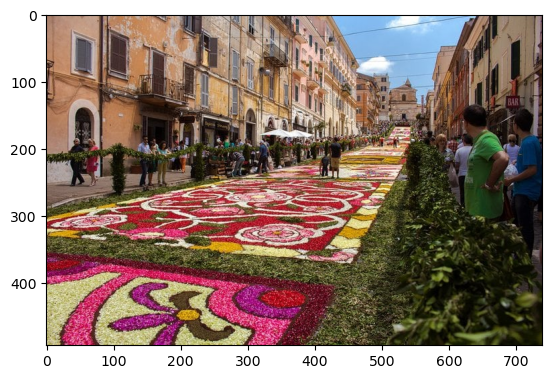

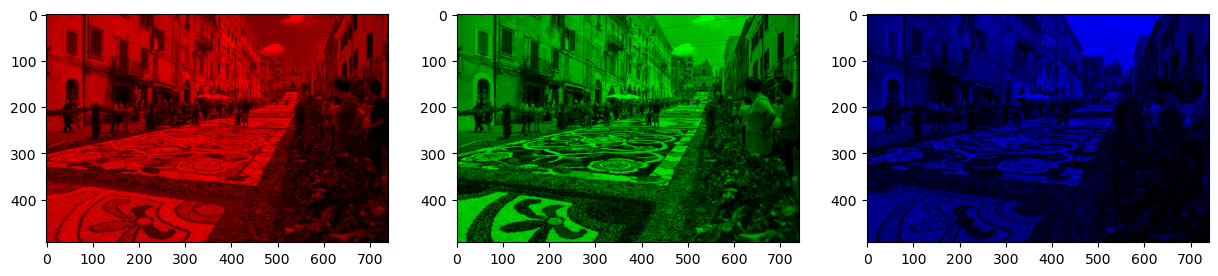

In [6]:
### Drawing the image tensor as an image
plt.imshow(image)
plt.show()

## 
plt.figure(figsize=(15,3))
plt.subplot(1, 3, 1)
image_red = np.asarray(image).copy()
image_red[:, :, 1:] = 0
plt.imshow(image_red)

plt.subplot(1, 3, 2)
image_green = np.asarray(image).copy()
image_green[:, :, ::2] = 0
plt.imshow(image_green)

plt.subplot(1, 3, 3)
image_blue = np.asarray(image).copy()
image_blue[:, :, :-1] = 0
plt.imshow(image_blue)
plt.show()

## Cropping the image (numpy slicing)

The slicing syntax normally used for numpy arrays can be used to crop the image. 

For example, let's try to focus on the large flower on the bottom left corner.

We can use the axes of the original image to guess the number of pixels at which we cut.

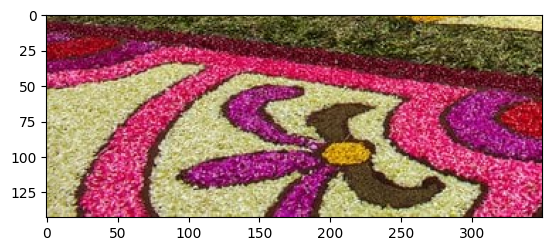

In [8]:
np_image = np.asarray(image)
plt.imshow(np_image[350:, :350])
plt.show()

However, once the picture is cropped, it is a new picture and it loose connections to its larger representation.
If you want to crop it further, you should rely on the axis labels of the original figure.

Once the zoom is sufficient, you clearly see the pixels composing the picture, and the tensorial representation of the image may become clearer.

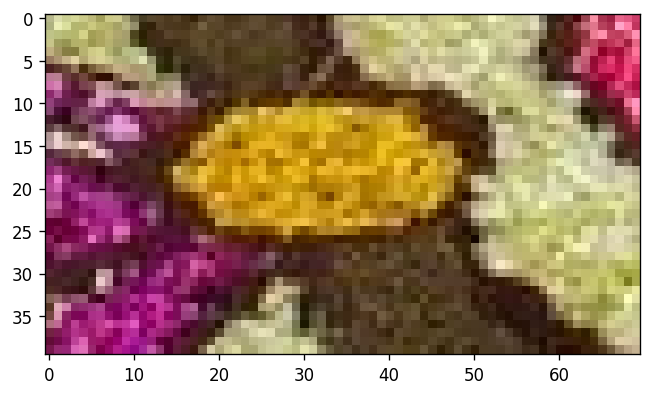

In [9]:
plt.figure(dpi=120)
plt.imshow(np_image[430:470, 180:250])
plt.show()

The same way we crop, we can reflect the image, for example along the $x$ axis.

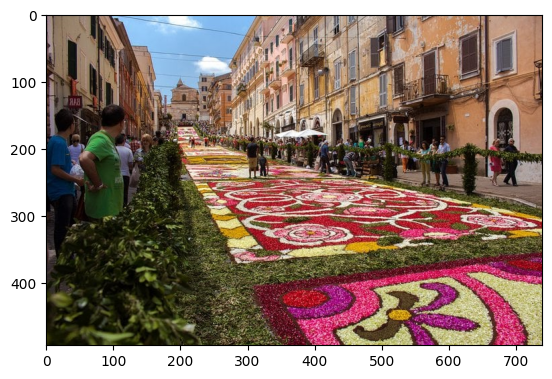

In [10]:
plt.imshow(np_image[:, ::-1])

To rotate the image you can use the `transpose` command, or simply the `.T` shortcut for single-color images

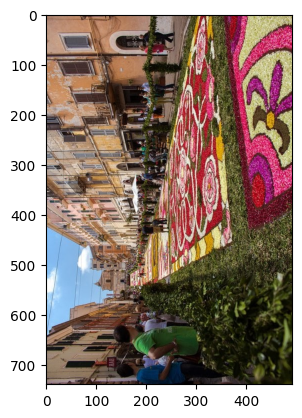

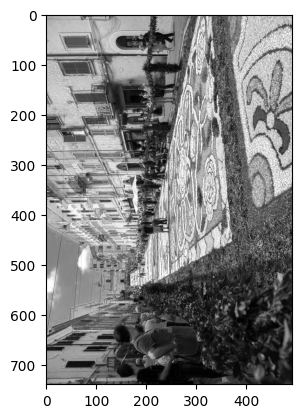

In [11]:
plt.imshow(np_image.transpose((1, 0, 2)))
plt.show()

plt.imshow(np_image[:,:,0].T, cmap='gray')
plt.show()

## Histograms of the pixel values and transformations

A tool that might be very useful to study the images from a quantitative point of view is the histogram of the pixel values.

Various histgrams can be built for the different representations of the pixel values that can be used. 
For example, one can plot the values of the red, green and blue channels.

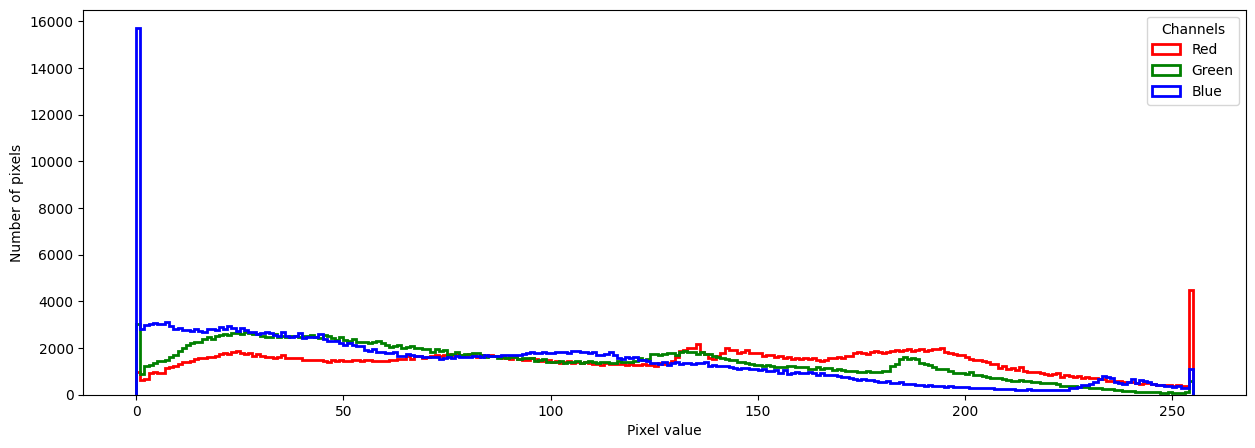

In [12]:
plt.figure(figsize=(15,5))
bins=np.linspace(0, 255, 256//1)
plt.hist(np_image[:, :, 0].flatten(), color='red', bins=bins, histtype='step', linewidth=2, label="Red")
plt.hist(np_image[:, :, 1].flatten(), color='green', bins=bins, histtype='step', linewidth=2, label="Green")
plt.hist(np_image[:, :, 2].flatten(), color='blue', bins=bins, histtype='step', linewidth=2, label="Blue")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")
plt.legend(title="Channels")
plt.show()

In the case of these colorful images, however, more information could be obtained from histograms of the hue, saturation and brightness (HSV representation).

So, let's convert the picture in HSV format, we split it into hue, saturation and values matrices, and then we build the histogram.

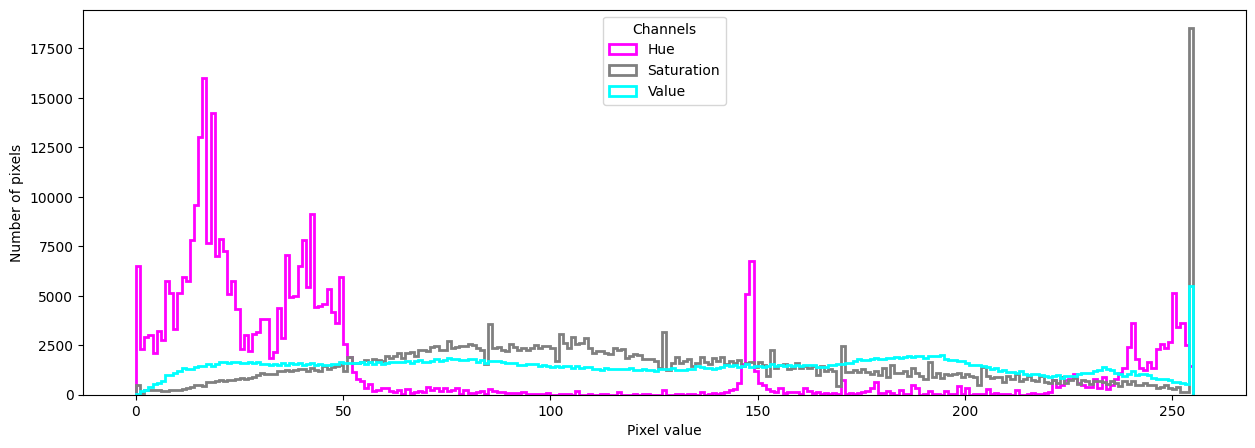

In [13]:
hsv_image = np.array(image.convert("HSV"))
hue, saturation, value = hsv_image.transpose(2, 0, 1)

plt.figure(figsize=(15,5))
bins=np.linspace(0, 255, 256//1)
plt.hist(hue.flatten(), color='magenta', bins=bins, histtype='step', linewidth=2, label="Hue")
plt.hist(saturation.flatten(), color='gray', bins=bins, histtype='step', linewidth=2, label="Saturation")
plt.hist(value.flatten(), color='cyan', bins=bins, histtype='step', linewidth=2, label="Value")
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")
plt.legend(title="Channels")
plt.show()

Value and saturation values have a large peak at 255 (representing the white pixels), but the other structures are not particularly interesting. 
The *hue*, instead, has many different peaks representing the different colors in the image.

In particular, four regions seem more populated. From left to right:
 * at around 20, corresponding to the red-orange of the walls
 * at around 40, corresponding to the green of the grass
 * at around 145, corresponding to the light blue of the sky
 * above 240, corresponding to the red of the flowers.

In the cell below, we show these components separately.

While you may feel disappointed for the not-particularly-scientific approach to this analysis, you may want to spend some time digesting the syntax used in numpy to select these hue slices in a RGB image.

For example, `tmp_image` is a rank-3 tensor representing the image in RGB color, `hue` is a rank-2 tensor (or a matrix) representing the hue of each pixel.
`hue < 25` is a boolean rank-2 tensor that holds `True` for all the pixels where the hue is smaller than 25. Finally, `~(hue < 25)` is again a rank-2 tensor that holds `False` for all the pixels where the hue is smaller than 25 (`~` is the NOT operator in numpy).

`tmp_image[~(hue < 25)]` is an indexing operation in which we select the RGB triplets of `tmp_image` where the boolean mask `~(hue < 25)` is `True`.

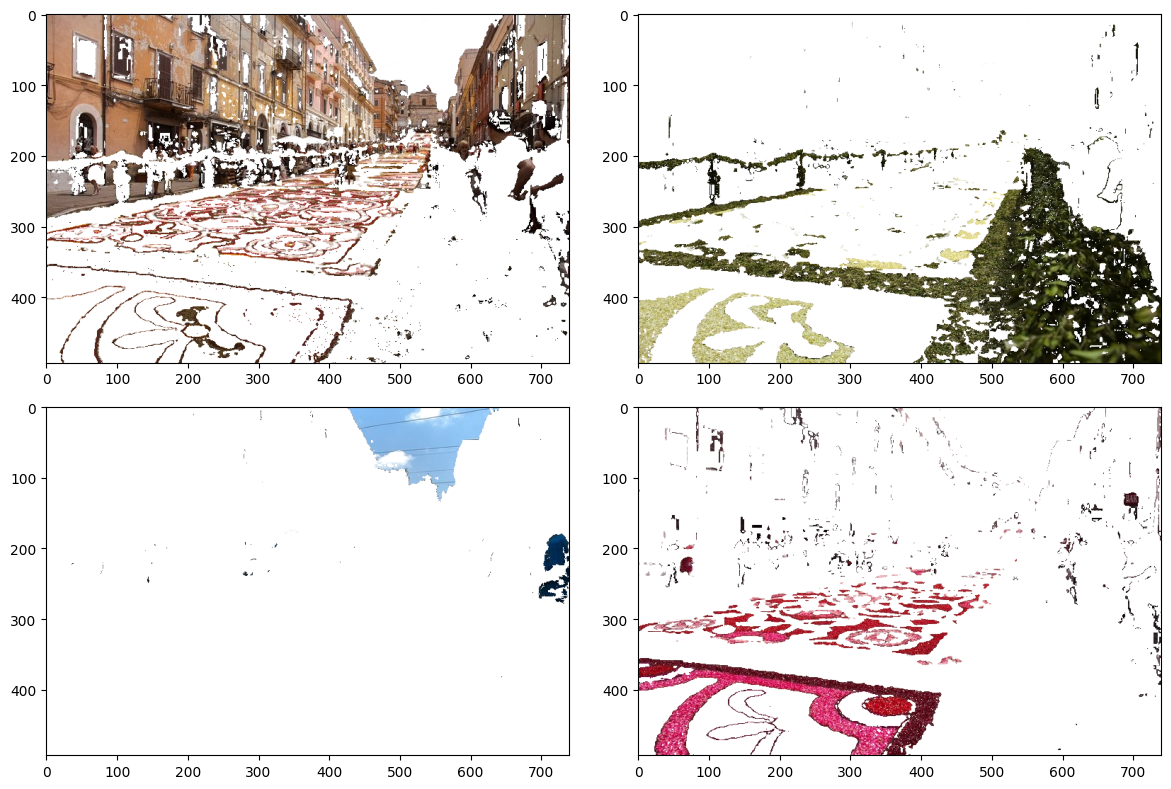

In [14]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
tmp_image = np_image.copy()
tmp_image[~(hue < 25)] = 255
plt.imshow(tmp_image)

plt.subplot(2,2,2)
tmp_image = np_image.copy()
tmp_image[abs(hue - 35) > 20] = 255
plt.imshow(tmp_image)

plt.subplot(2,2,3)
tmp_image = np_image.copy()
tmp_image[abs(hue - 140) > 10] = 255
plt.imshow(tmp_image)

plt.subplot(2,2,4)
tmp_image = np_image.copy()
tmp_image[hue < 235] = 255
plt.imshow(tmp_image)

plt.tight_layout()

# Single-channel images

For scientific applications, single-channel images are certainly more common.

A single-channel image can be represented, again, as a matrix of unsigned 8-bit integers, but can also be a matrix of floating point numbers, which can clearly encode much more information. 

In the cell below, we convert the **brightness** channel of the image we are considering from unsigned integer to 64-bit float representation. 

Traditionally, when represented as a floating point, pixel values are normalized to the range $[0, 1]$.

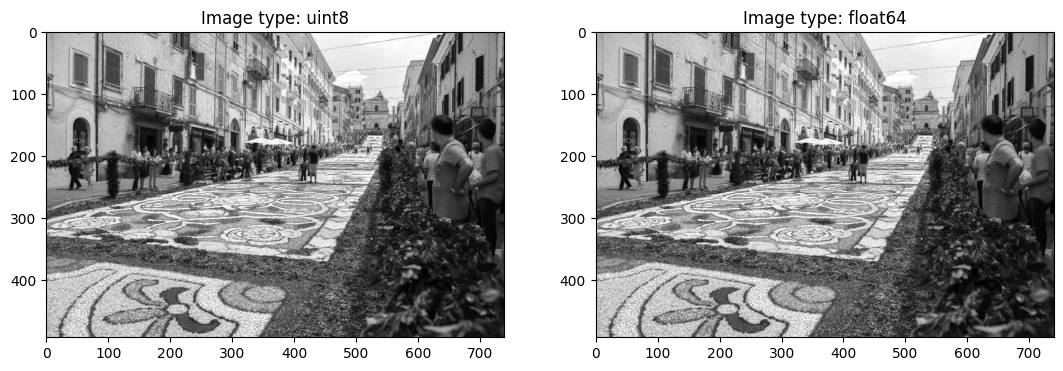

In [15]:
image_gray = hsv_image[:,:,2]
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.imshow(image_gray, cmap='gray')
plt.title(f"Image type: {image_green.dtype}")
plt.subplot(1,2,2)
image_gray_float = image_gray/255
plt.imshow(image_gray_float, cmap='gray')
plt.title(f"Image type: {image_gray_float.dtype}")
plt.show()

In the example above, we have used the gray scale, but that is an arbitrary choice. We can use any other color scale by choosing `cmap` properly.

For example,


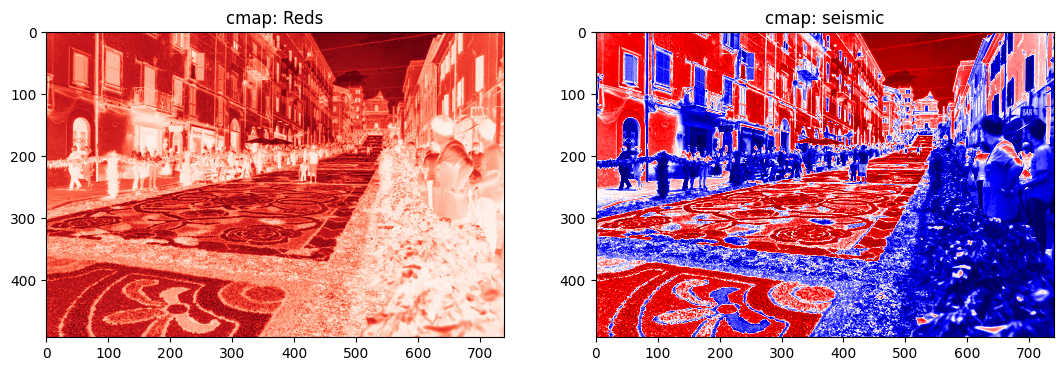

In [16]:
image_gray = hsv_image[:,:,2]
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.imshow(image_gray, cmap='Reds')
plt.title("cmap: Reds")
plt.subplot(1,2,2)
image_gray_float = image_gray/255
plt.imshow(image_gray_float, cmap='seismic')
plt.title("cmap: seismic")
plt.show()

Details of the image (especially when using input data with more than 256 values) can be not visible to the image because the contrast is not sufficient.

**Windowing** is the process of selecting some segment of the total pixel value range (the wide dynamic range of the receptors) and then displaying the pixel values within that segment over the full brightness.

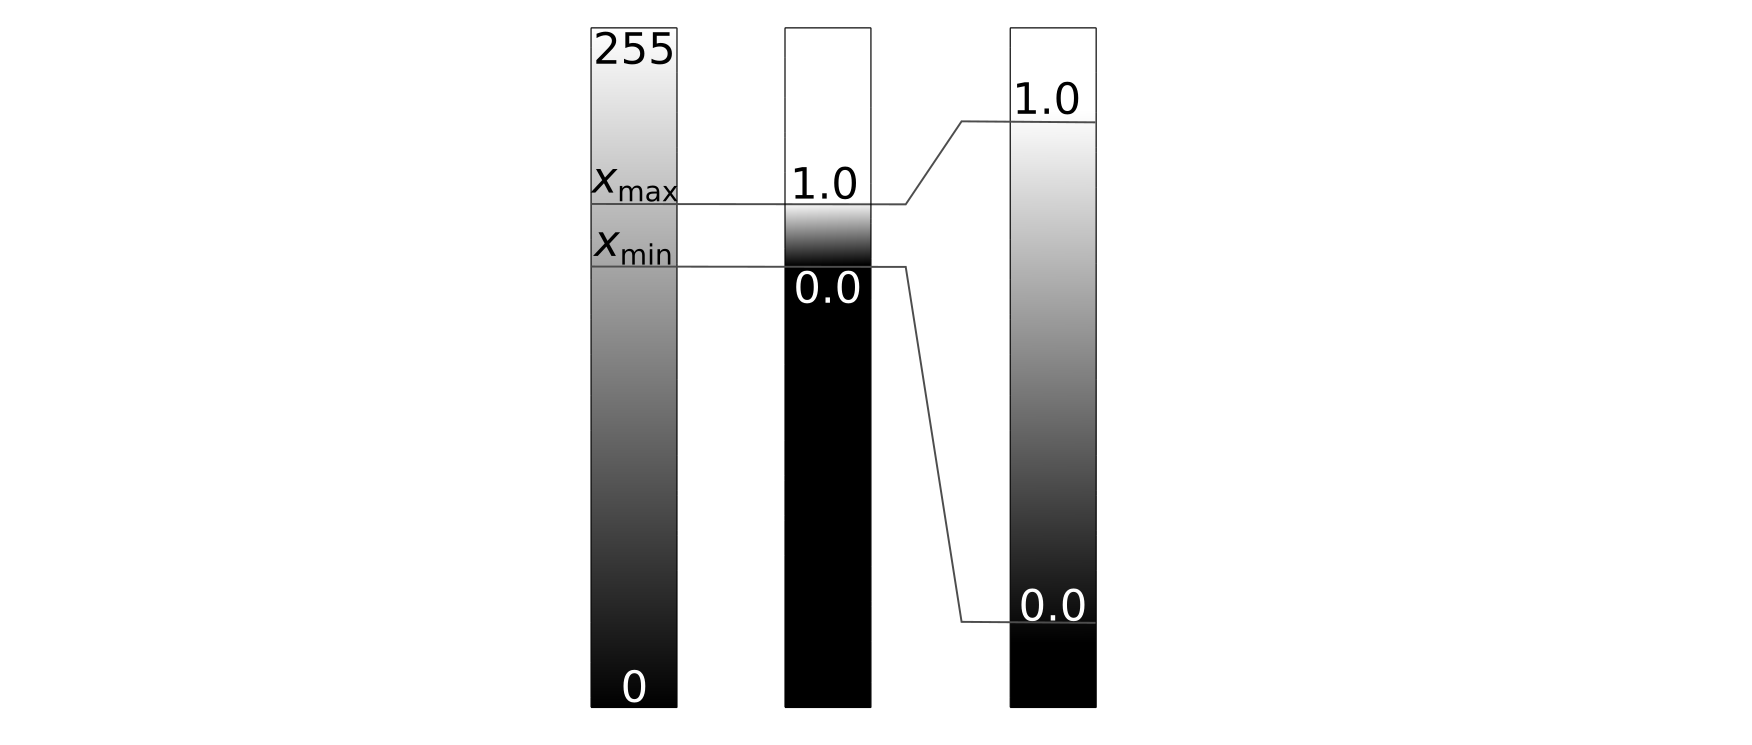

In practice, we are applying a function that transform each pixel values into another pixel value. The function we are applying will be
$$
f(x) = \left\{
\begin{array}{ll}
0 \quad & \mathrm{if}\ x < x_{\mathrm {min}} \\
\displaystyle
\frac{x - x_{\mathrm{min}}}{x_{\mathrm{max}} - x_{\mathrm{min}}} \quad & \mathrm{if}\ x \in [x_{\mathrm {min}}, x_{\mathrm {max}}] \\
1 \quad & \mathrm{if}\ x > x_{\mathrm {max}} \\
\end{array}
\right.
$$

Plotted below together with an example of application to the image with $x_\mathrm{min} = 0.15$ and $x_\mathrm{max} = 0.25$.

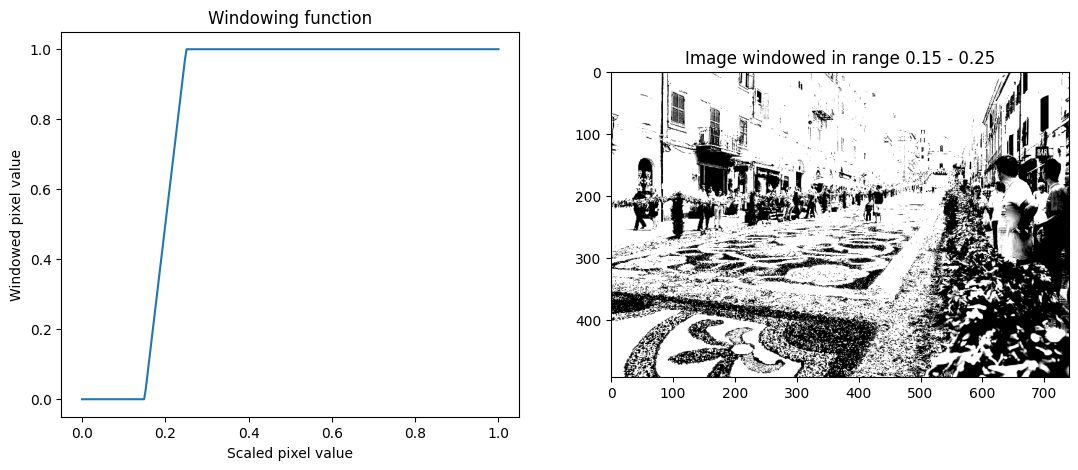

In [17]:
def windowing(figure, x_min, x_max):
    """Windowing function as described above"""
    rescaled = (figure - x_min)/(x_max - x_min)
    return np.clip(rescaled, 0, 1)
        

image_green = np.asarray(image)[:,:,1].copy()
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)

c, h = 0.2, 0.05

xAxis = np.linspace(0, 1, 256)
plt.plot(xAxis, windowing(xAxis, c-h, c+h))
plt.title("Windowing function")
plt.xlabel("Scaled pixel value")
plt.ylabel("Windowed pixel value")

plt.subplot(1,2,2)
image_green_float = image_green/255
c, h = 0.2, 0.05
plt.imshow(windowing(image_green_float, c-h, c+h), cmap='gray')
plt.title(f"Image windowed in range {c-h:.2f} - {c+h:.2f}")
plt.show()

## Flattening the histogram

An alternative transformation sometimes used is the *QuantileTransform* or *Rank transform* which aims at shifting the pixel values in a way that 
flattens the histogram, pushing it towards a uniform distribution.

This transform is useful because it maximize the number of different levels that are visible to the human eye. However, without a prior windowing step it may expand useless sets of levels, simply because the pixels with those levels are many. Think to borders, backgrounds or fillers. 

In this case, the function to be applied is the cumulative distribution of the histogram, which we compute simply as `np.cumsum` / `np.sum`.


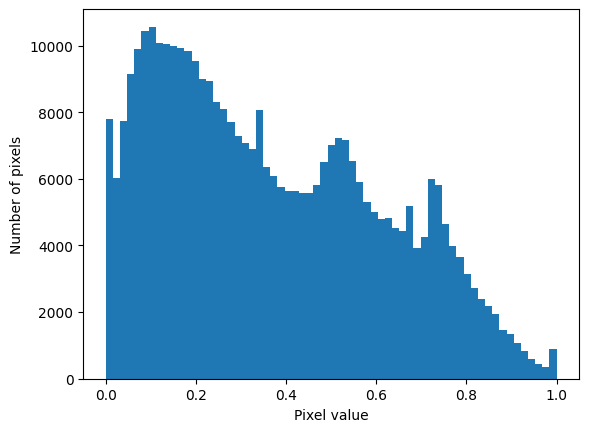

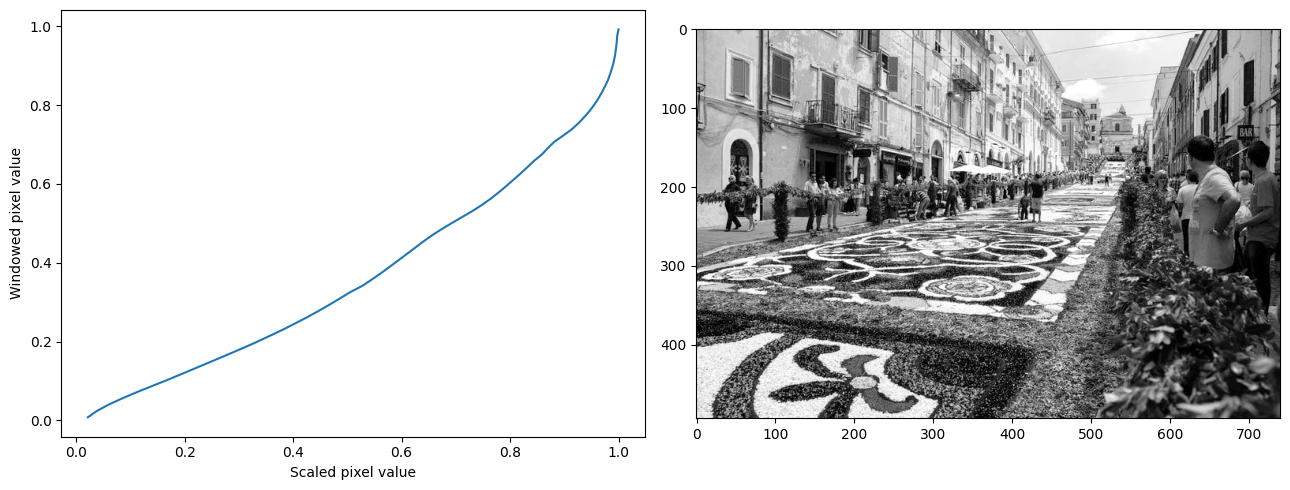

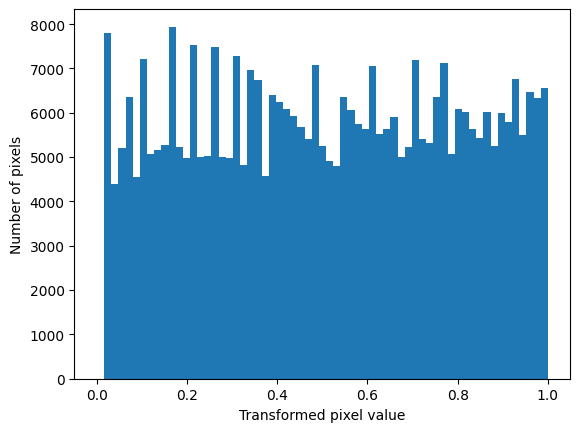

In [18]:
bins = np.linspace(0, 1, 64)
contents, bins, _ = plt.hist(image_green_float.flatten(), bins=bins)
cumulative = np.cumsum(contents)/contents.sum()
xAxis = 0.5*(bins[1:] + bins[:-1])
plt.xlabel("Pixel value")
plt.ylabel("Number of pixels")
plt.show()


plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(cumulative, xAxis)
plt.xlabel("Scaled pixel value")
plt.ylabel("Windowed pixel value")

plt.subplot(1,2,2)
q_transformed = np.interp(image_green_float, xAxis, cumulative)
plt.imshow(q_transformed, cmap='gray')

plt.tight_layout()
plt.show()

contents, bins, _ = plt.hist(q_transformed.flatten(), bins=bins)
cumulative = np.cumsum(contents)/contents.sum()
xAxis = 0.5*(bins[1:] + bins[:-1])
plt.xlabel("Transformed pixel value")
plt.ylabel("Number of pixels")
plt.show()


## Noise

The noise in an image is usually an additional contribution to the pixel value that does not carry useful information to the image processing.

The simplest possible noise is an uncorrelated Gaussian noise. 

Correlations between adjacent pixels and non-Gaussian tails are typical complications of noise.

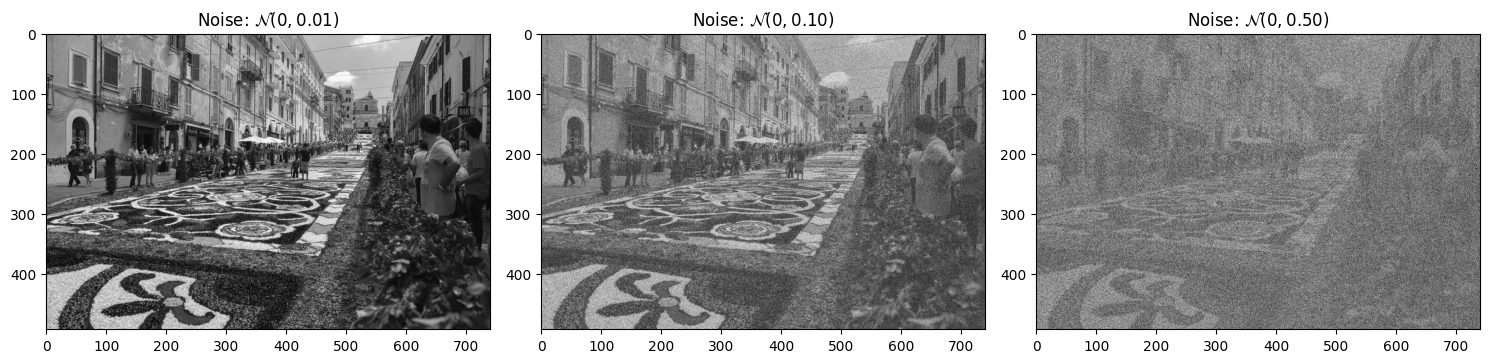

In [19]:
plt.figure(figsize=(15,4))
for iPlot, noise_level in enumerate((1e-2, 1e-1, 5e-1), 1):
    plt.subplot(1, 3, iPlot)
    plt.imshow(image_green_float + np.random.normal(0, noise_level, image_green.shape), cmap='gray')
    plt.title(f"Noise: $\mathcal{{N}}(0, {noise_level:.2f})$")
plt.tight_layout()
plt.show()

## Saving an image back to disk
To save an image back to disk:
 * make sure it has unsigned 8-bit integer representation (on the interval 0-255)
 * use `PIL.Image.fromarray` to conver the matrix (or the tensor back to PIL)
 * use `.save` to save it to disk

In one line:

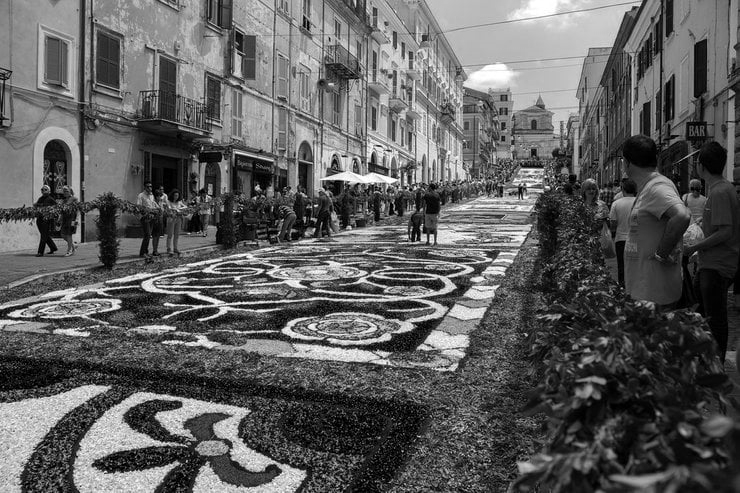

In [20]:
PIL.Image.fromarray((255 * image_green_float).astype(np.uint8)).save("edited_image.png")

## Reloading for cross-ckeck
PIL.Image.open("edited_image.png")

## Conclusion

In this notebook we tried to build a minimal tool box to play with images in Python.
We discussed in particular, 
 * how to load figures from PNG or JPEG files
 * the representation of an image in `numpy`
 * the representation of colors with different modes
 * slicing and indexing for cropping and inverting the figures
 * transposition to rotate the figures
 * boolean maps to select non-rectangular portions of the images
 * single-channel images
 * windowing and windowing function
 * quantile transformation
 * Gaussian noise and complications
 * how to store an image back to disk in PNG format